# Clasificación de Baches en Tiempo Real con modelo Yolo8


In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#En este case se necesita una API key para poder descargar el dataset, si no se tiene se puede omitir esta parte y subir el dataset a google drive y montarlo.
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("projects-hjaax").project("pothole-detection-using-yolov5")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-detection-using-YOLOv5-1 in yolov8:: 100%|██████████| 1342/1342 [00:00<00:00, 3367.74it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=45 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 22.5MB/s]
New https://pypi.org/project/ultralytics/8.3.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Pothole-detection-using-YOLOv5-1/data.yaml, epochs=45, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, 

In [7]:
!ls {HOME}/runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1732238730.dbbe671acc11.1387.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1050.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1051.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1052.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


In [11]:

print(HOME)

# Download the detect folder after training
!zip -r detect.zip {HOME}/runs/detect/train

print("detect folder zipped as detect.zip")


/content
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 38%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 37%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 5%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 1%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 1%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 38%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/train_batch1050.jpg (deflated 4%)
  adding: content/runs/detect/train/PR_curve.png (deflated 19%)
  adding: content/runs/detect/train/P_curve.png (defl

/content


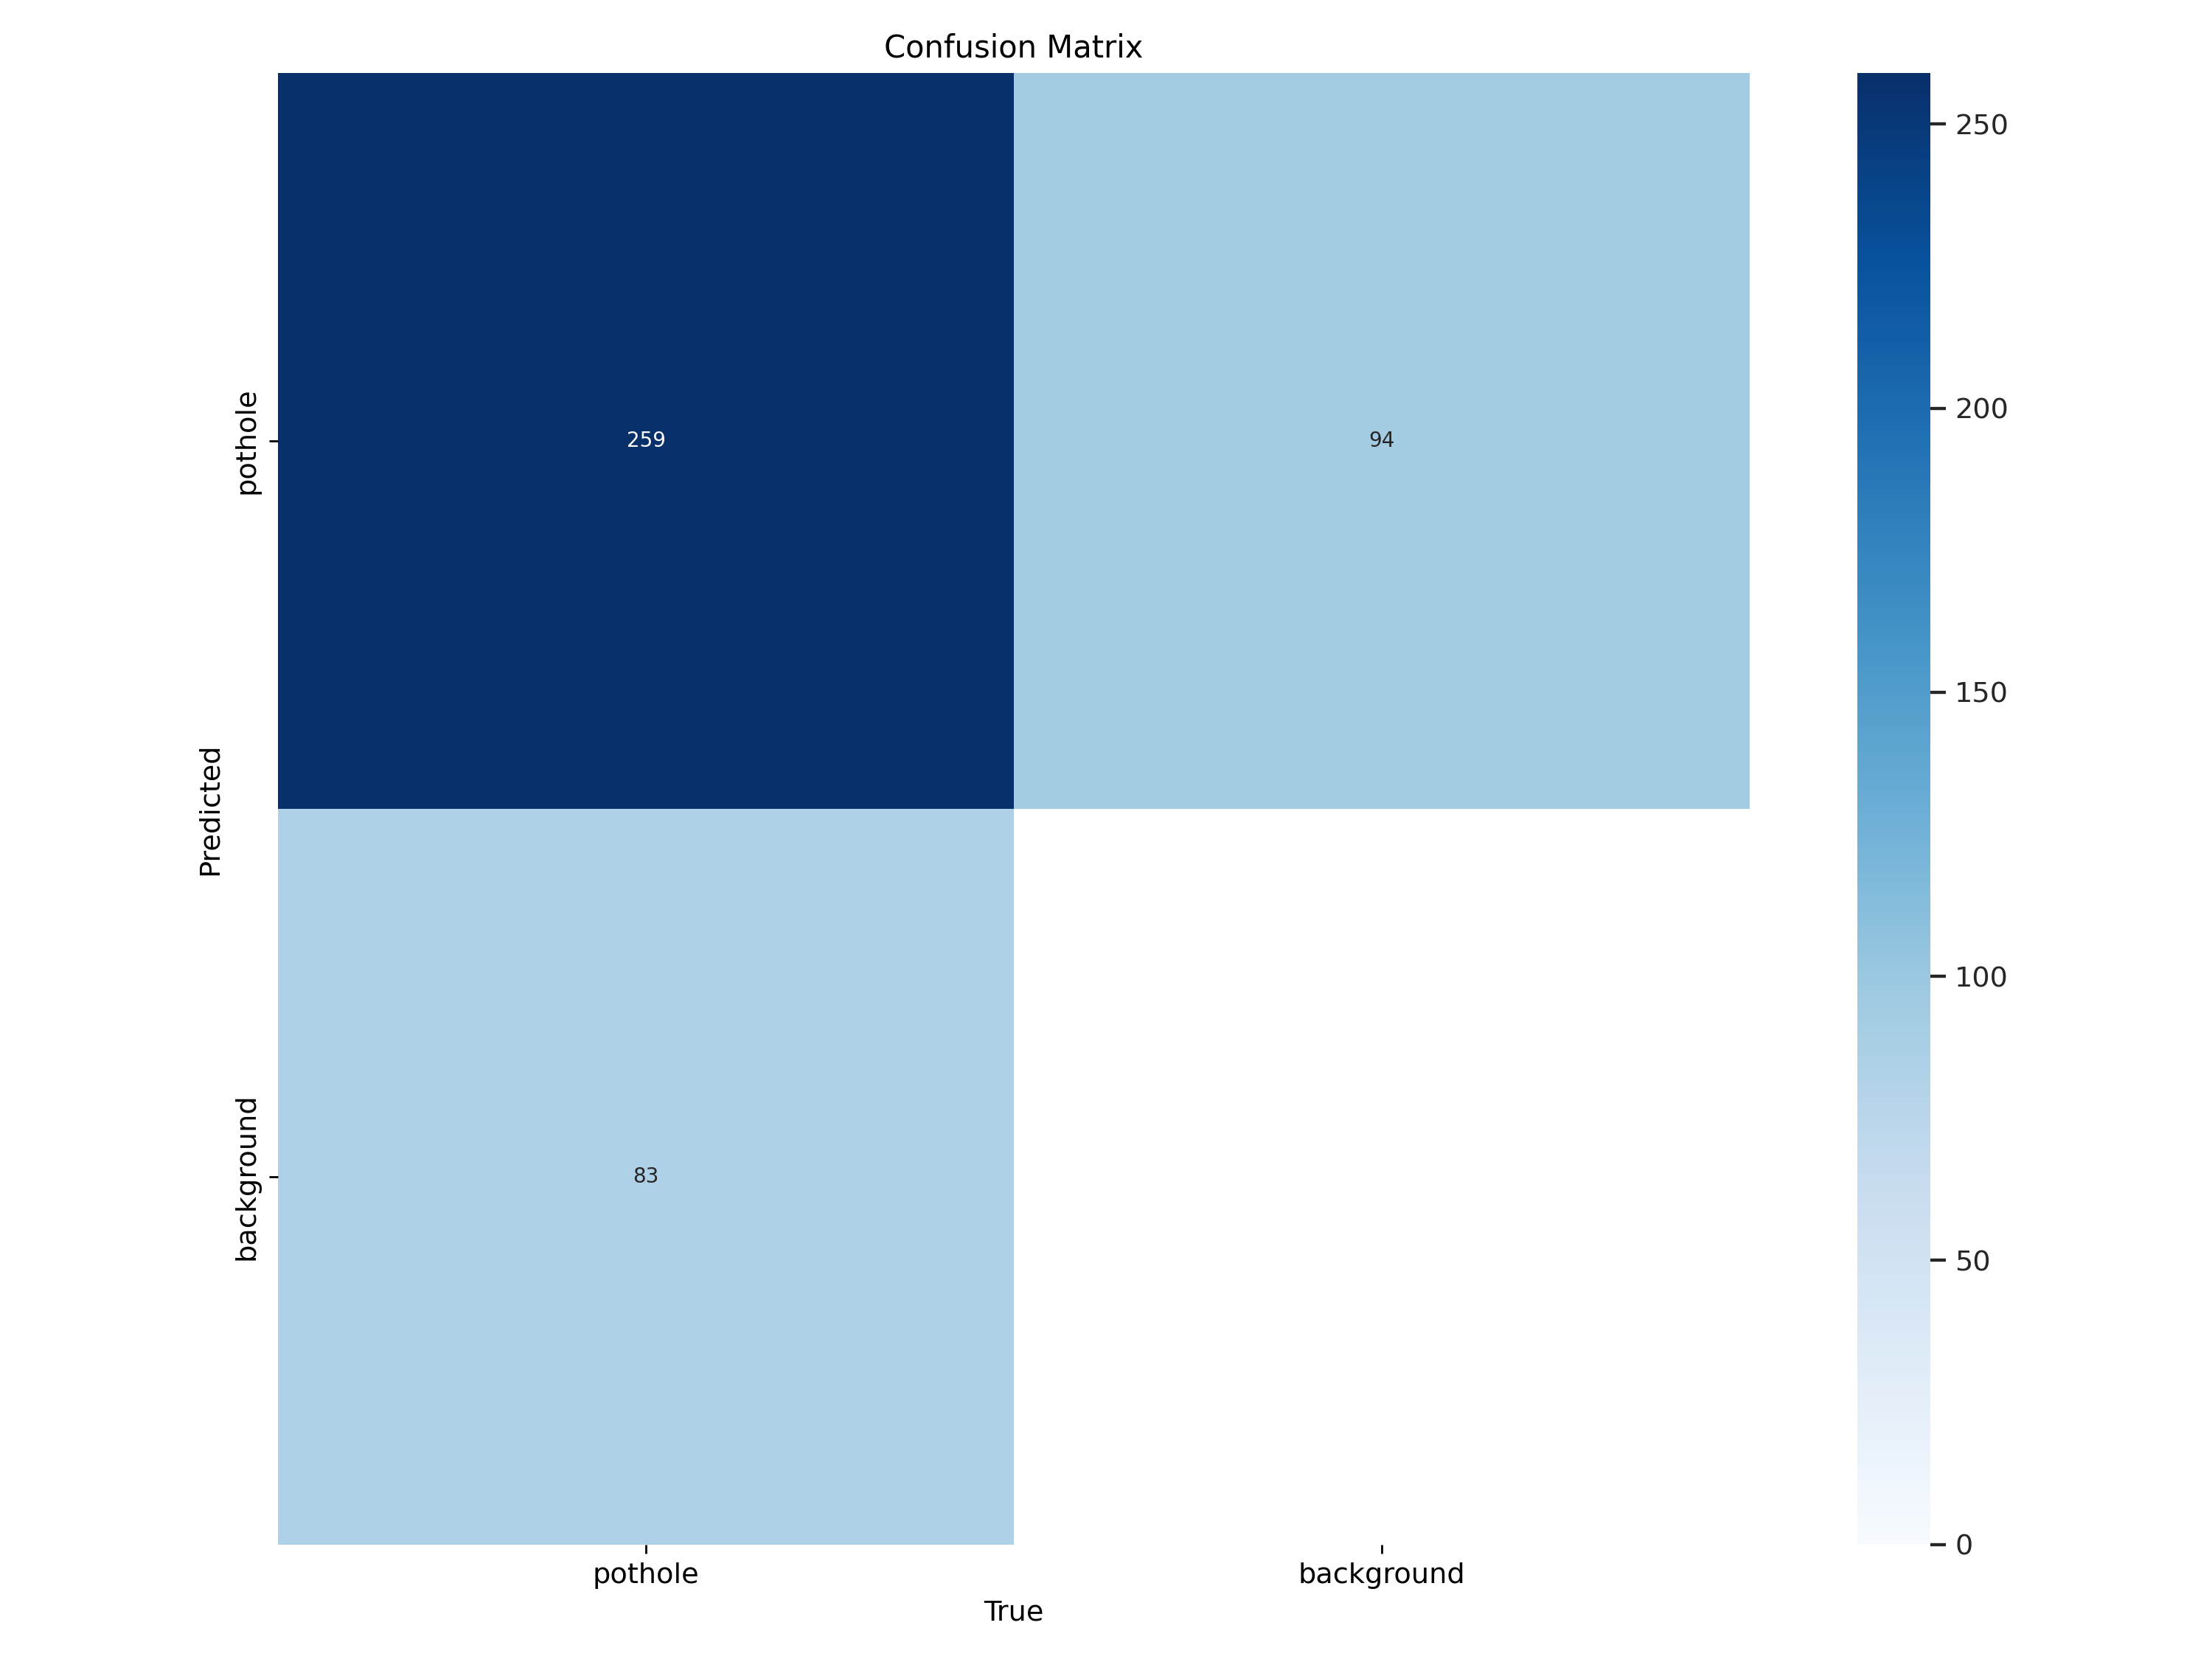

In [8]:
#Matriz de confusion

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


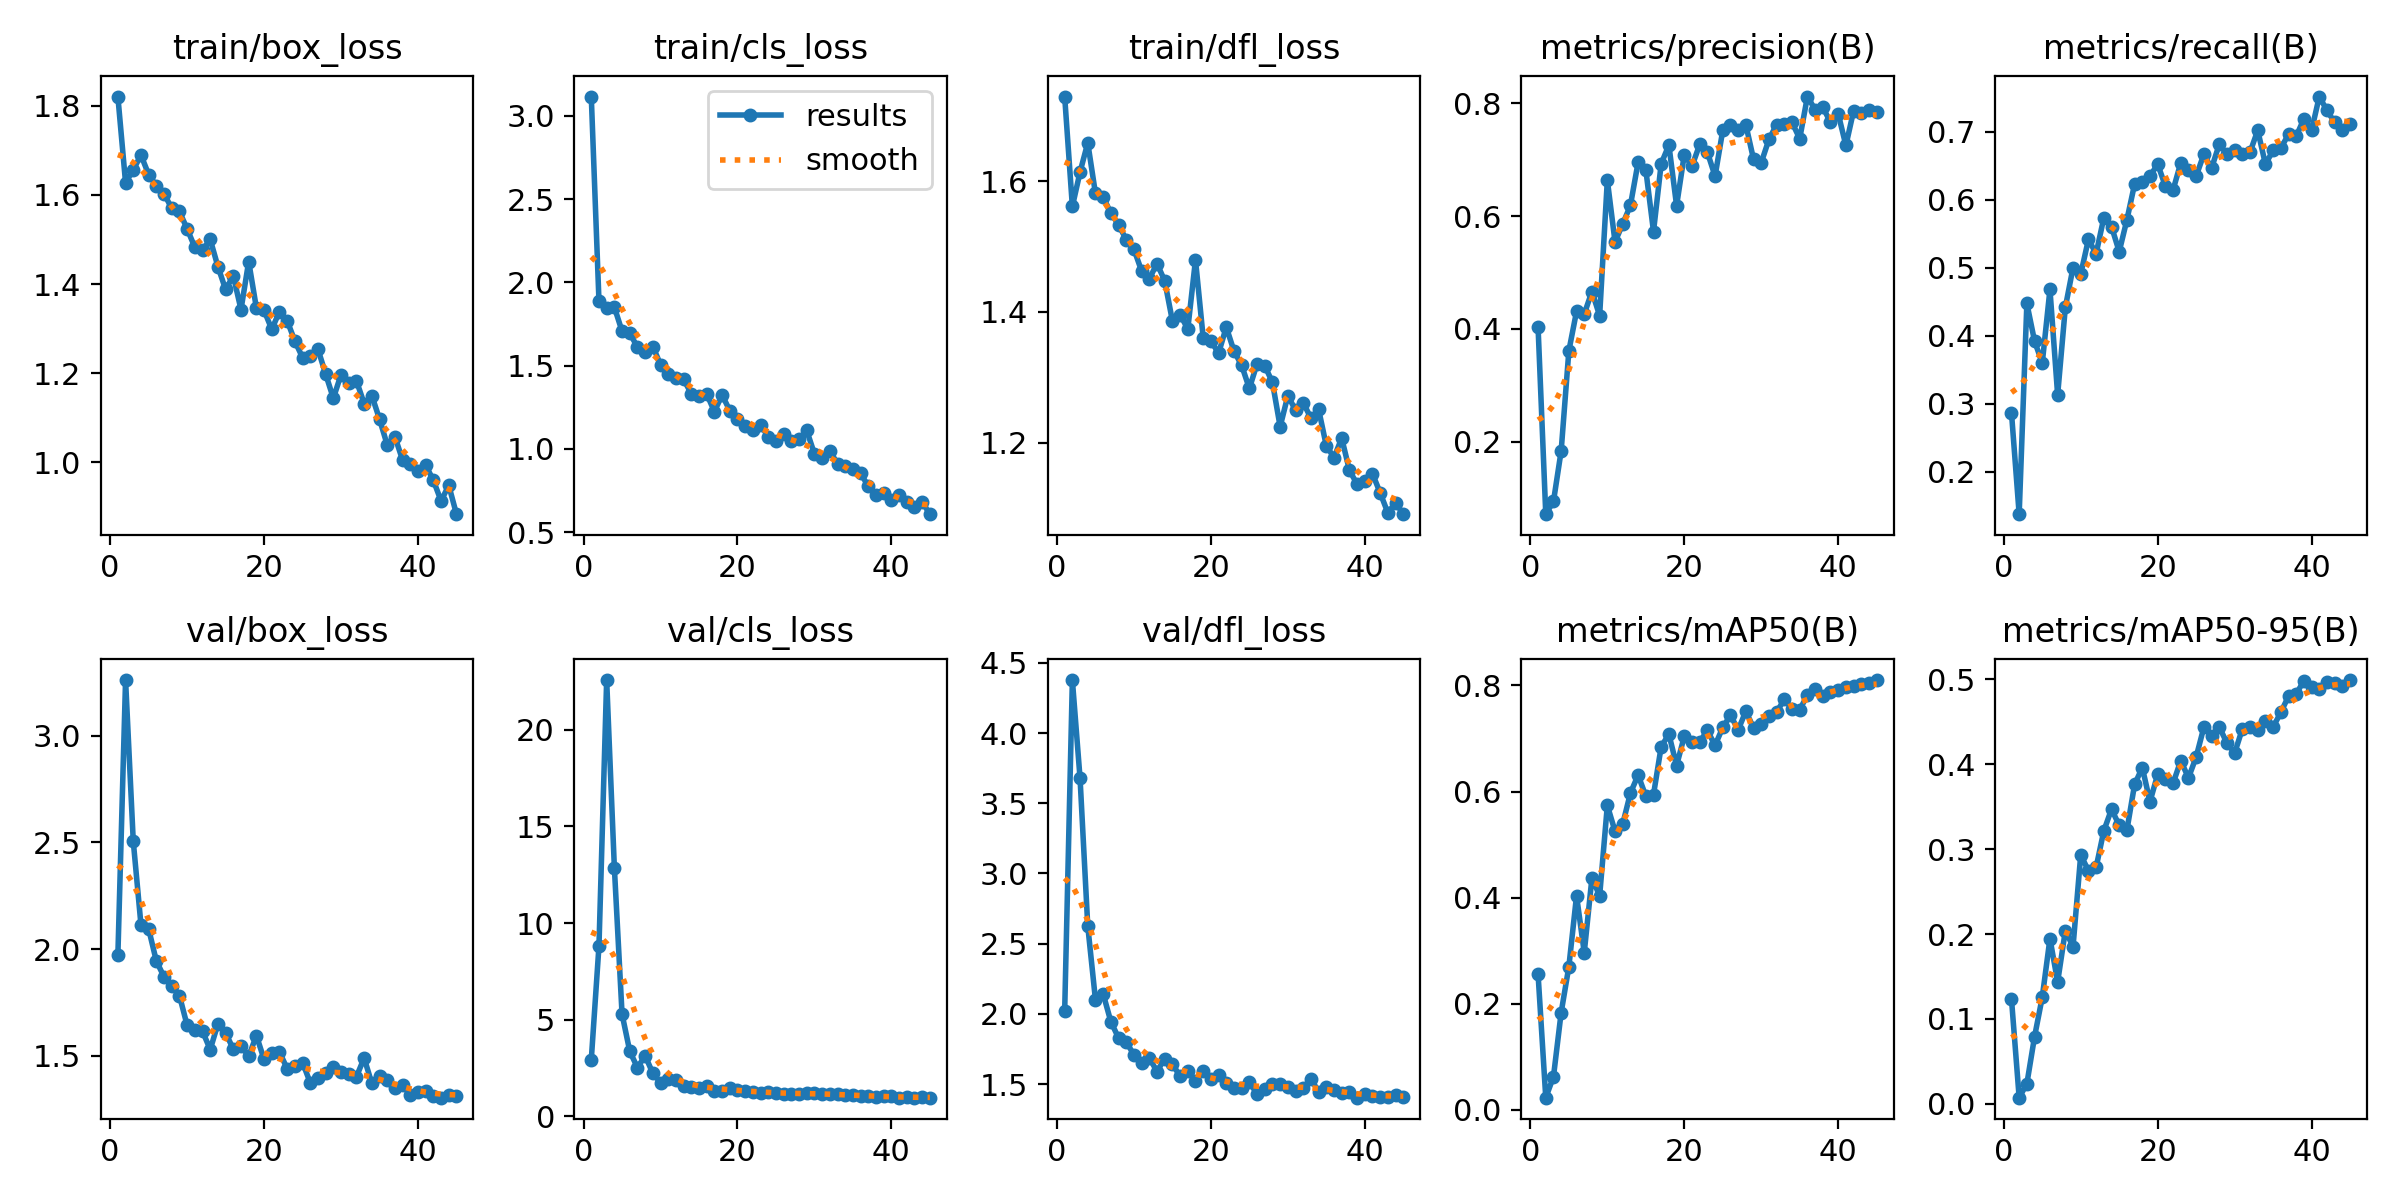

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


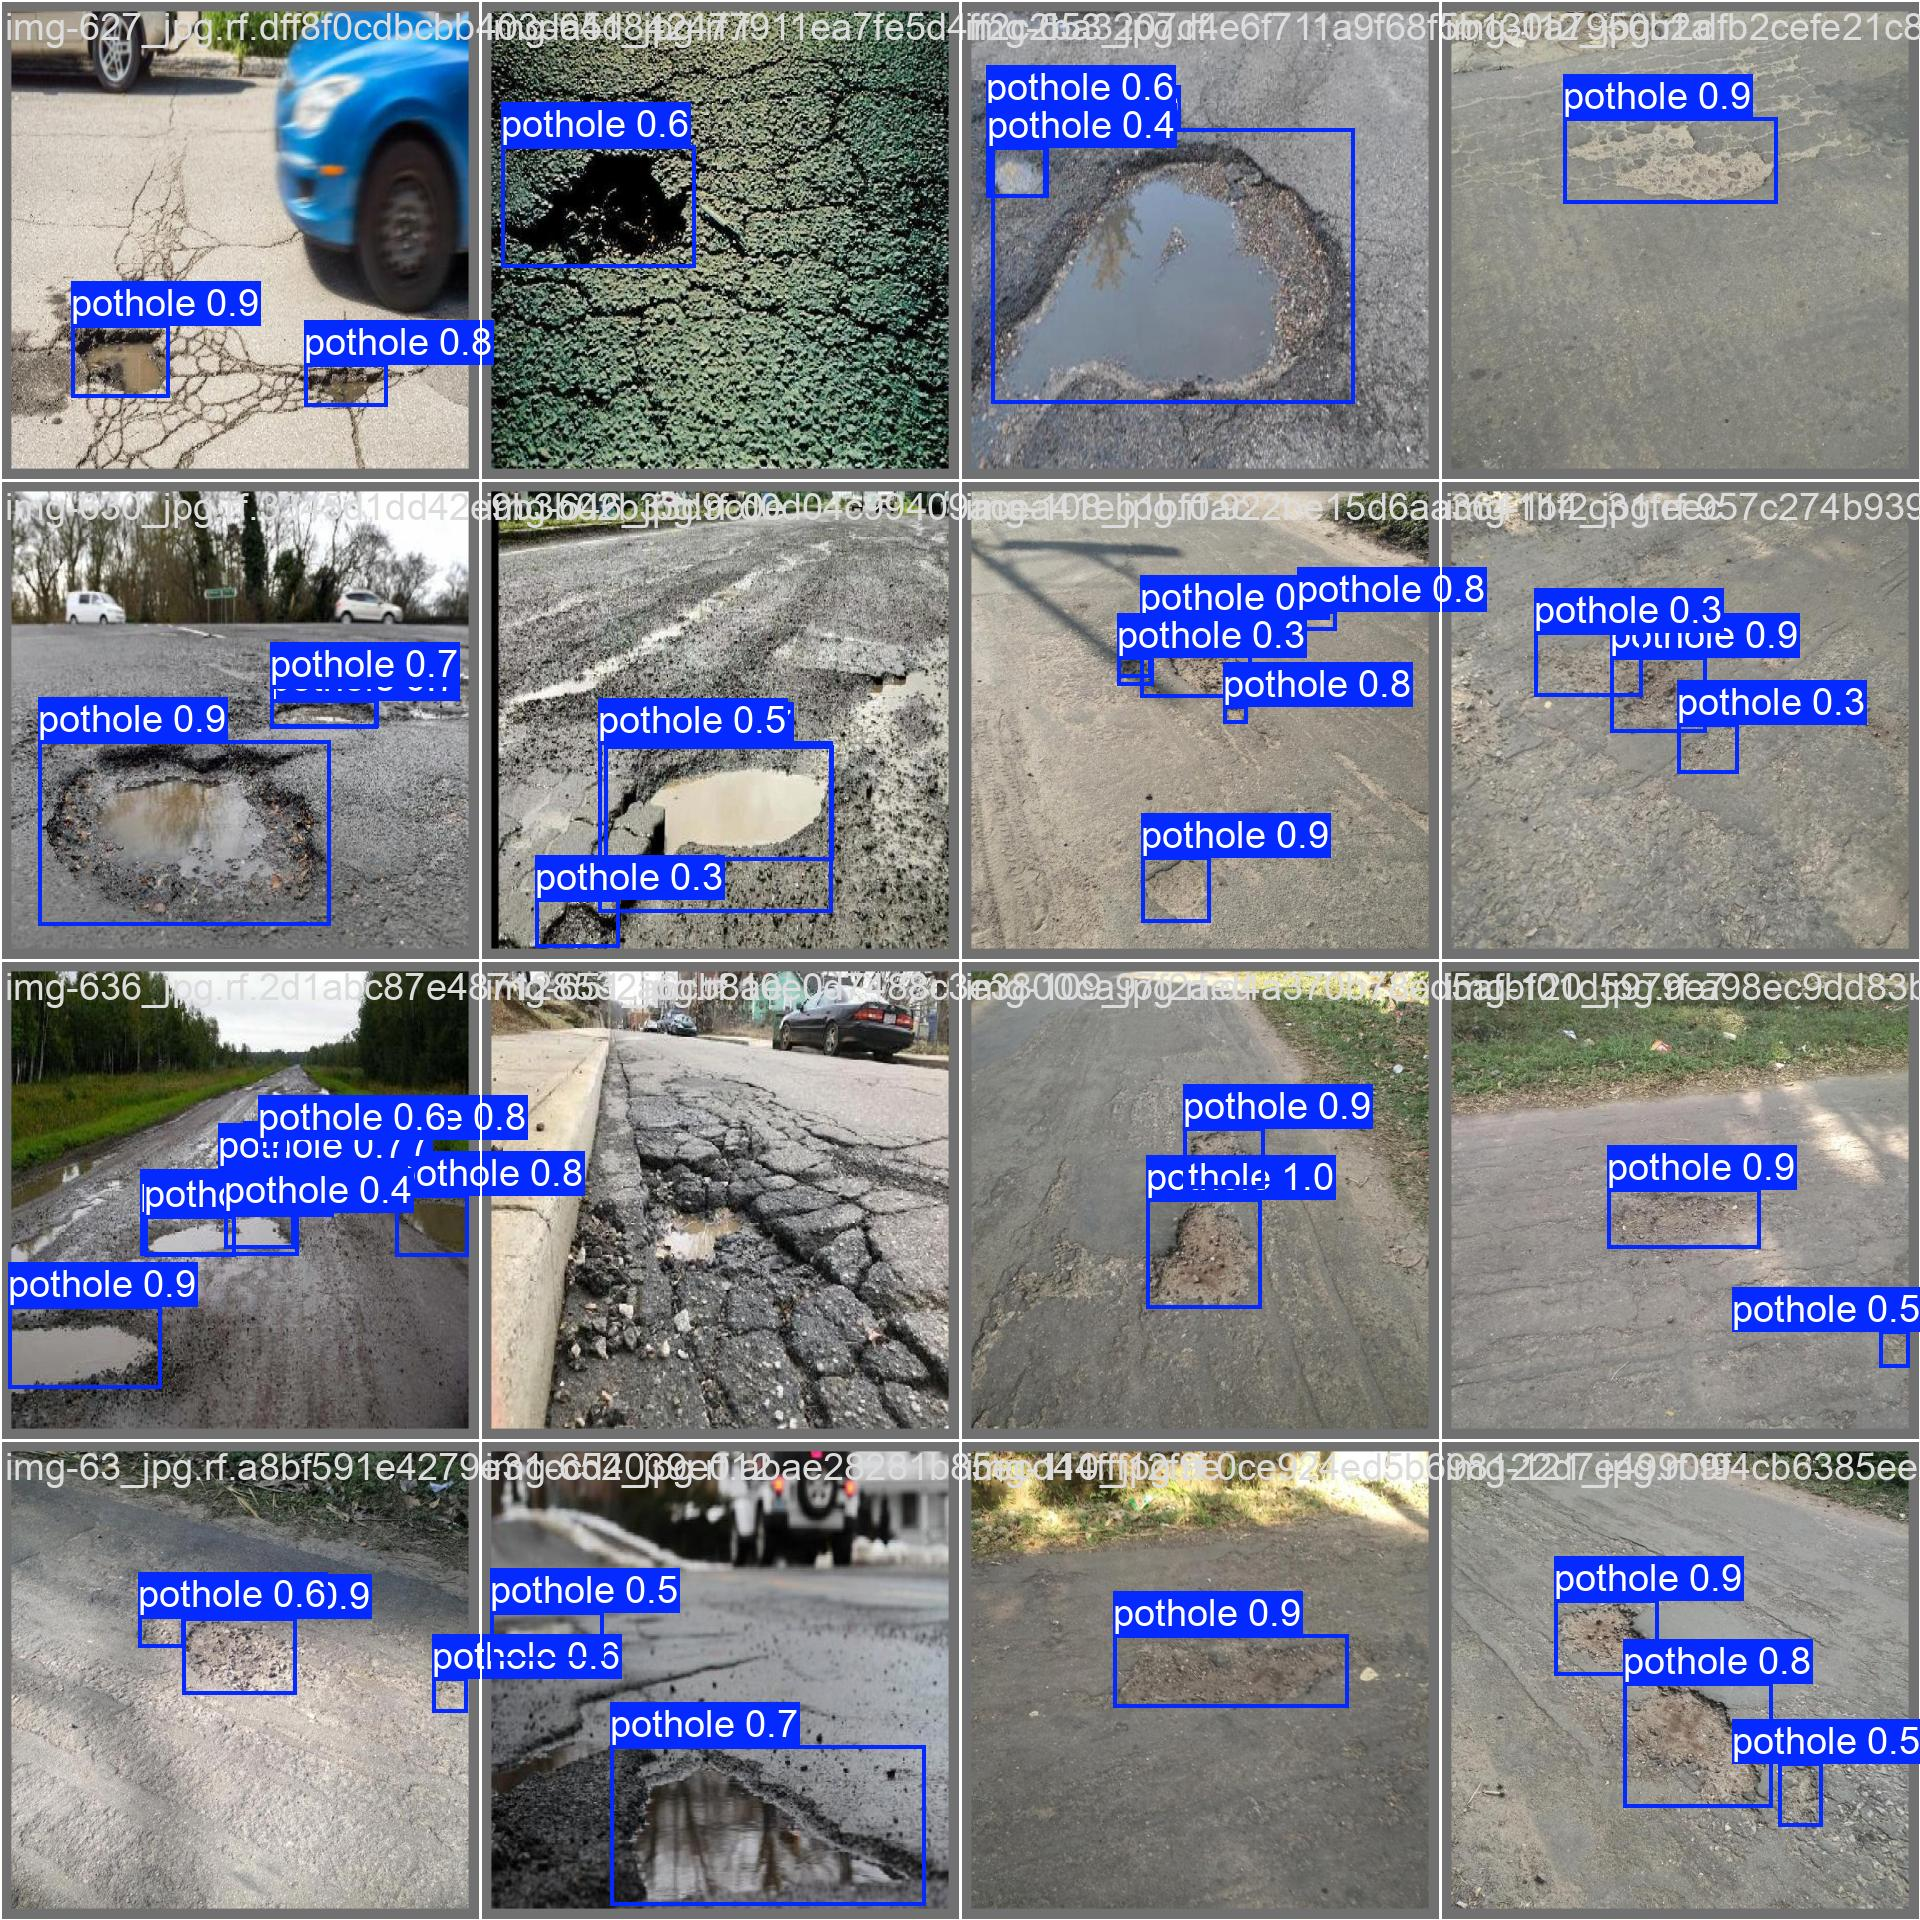

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
#Validar modelo

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Pothole-detection-using-YOLOv5-1/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:04<00:00,  2.06it/s]
                   all        133        342      0.789      0.713      0.812      0.499
Speed: 3.0ms preprocess, 10.4ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
# Download the detect folder after train
!zip -r detect.zip {HOME}/runs/detect/val

print("detect folder zipped as detect.zip")


  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 37%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 38%)
  adding: content/runs/detect/val/PR_curve.png (deflated 19%)
  adding: content/runs/detect/val/P_curve.png (deflated 17%)
  adding: content/runs/detect/val/F1_curve.png (deflated 17%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/detect/val/R_curve.png (deflated 16%)
detect folder zipped as detect.zip


In [15]:
#Inferencia con el modelo
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-106_jpg.rf.a6cb5366859b4d5c9d1fcc0af6a5c1b5.jpg: 640x640 2 potholes, 16.2ms
image 2/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-124_jpg.rf.a00e6351da1cb6f622a39ef36657c540.jpg: 640x640 6 potholes, 16.3ms
image 3/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-146_jpg.rf.ca0dcb84640b60cd337dde07d3e1db32.jpg: 640x640 2 potholes, 16.3ms
image 4/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-171_jpg.rf.6f5f59b8fcf9edfa5760e0abb22dcb81.jpg: 640x640 1 pothole, 16.2ms
image 5/67 /content/datasets/Pothole-detection-using-YOLOv5-1/test/images/img-175_jpg.rf.59795b56b181b1977ccd6e2b5be20a8d.jpg: 640x640 3 potholes, 16.2ms
image 6/67 /content/datasets/Pothole-detection-usi

In [17]:
# Download the detect folder after predict
!zip -r detect.zip {HOME}/runs/detect/predict


  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/img-192_jpg.rf.1298f0af5cf1c7bc96dbf03e086a4317.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-584_jpg.rf.d4e6e3d58c8c914dfb9d2e766cb14b10.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-47_jpg.rf.63439eeb03bf64ead9177a842a02406f.jpg (deflated 6%)
  adding: content/runs/detect/predict/img-177_jpg.rf.f934fb23b5993f8e0474e89fbeaaa26c.jpg (deflated 6%)
  adding: content/runs/detect/predict/img-322_jpg.rf.c6a64bb1836c7b0c5512e9041a89a8e8.jpg (deflated 6%)
  adding: content/runs/detect/predict/img-211_jpg.rf.4395c0c92cd580ca17baf7a1702cdcc6.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-146_jpg.rf.ca0dcb84640b60cd337dde07d3e1db32.jpg (deflated 5%)
  adding: content/runs/detect/predict/img-566_jpg.rf.da6519ed0822de5f72aecf8526e37d5c.jpg (deflated 4%)
  adding: content/runs/detect/predict/img-232_jpg.rf.fd4c0a0039f2eb748e05246f3b39e125.jpg (deflated 5%)
  adding: cont

In [19]:
#Descargamos el modelo que mandaremos a produccion
from google.colab import files

# Download the best.pt model file
files.download(f'{HOME}/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>